<a href="https://colab.research.google.com/github/Ziyi-star/Bachelor-Project/blob/main/notebooks/handlebar/LSTM/Lstm__Handlebar_best.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# For Vscode
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
from datetime import datetime
from matplotlib import pyplot as plt
from matplotlib import dates as md
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
import tensorflow as tf #building model

import sys
sys.path.append('../../../')   # Add parent directory to Python path
from utils.Plots import *

df = pd.read_csv('../../../data/handlebar/train_data.csv')
# 0 for normal, 1 for abnormal
df['curb_scene'].value_counts()
#df.drop('Unnamed: 0', axis=1, inplace=True)
print(df.shape)
df.head()

(7453, 101)


,curb_scene,Acc-Z_1,Acc-Z_2,Acc-Z_3,Acc-Z_4,Acc-Z_5,Acc-Z_6,Acc-Z_7,Acc-Z_8,Acc-Z_9,...,Acc-Z_91,Acc-Z_92,Acc-Z_93,Acc-Z_94,Acc-Z_95,Acc-Z_96,Acc-Z_97,Acc-Z_98,Acc-Z_99,Acc-Z_100
0,0.0,9.595963,11.133041,4.472366,4.592072,5.310333,17.501617,17.319656,11.291061,1.508347,...,12.737152,5.166687,1.039078,4.481949,12.052414,14.475342,10.692505,5.358231,9.576813,11.377243
1,0.0,10.783478,6.344635,7.445969,5.238510,13.091492,11.386826,10.783478,11.496963,6.526596,...,1.403000,5.516235,14.652512,20.005950,19.383453,8.058884,-1.537079,1.977615,7.565674,12.028473
2,0.0,3.337524,7.517792,9.902420,10.031708,8.283936,4.472366,3.035843,3.643982,7.814682,...,14.216766,7.493851,5.602432,4.893753,6.569687,9.054871,15.021225,13.584702,7.206543,3.801987
3,0.0,18.243820,16.591812,5.564117,0.545883,5.013458,14.211975,14.006073,8.705322,2.978394,...,11.310211,-10.534485,16.476898,21.538239,-7.268799,-34.404680,-28.218063,5.147537,11.401184,-16.716324
4,0.0,4.596863,6.186615,15.246277,13.919891,8.963898,2.796432,6.962341,13.867218,13.541611,...,14.494492,3.821152,-0.531509,0.780502,14.202408,24.056946,18.804062,7.503433,4.218582,7.766785


In [ ]:
# For Colab
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
from datetime import datetime
from matplotlib import pyplot as plt
from matplotlib import dates as md
from sklearn.preprocessing import StandardScaler
import tensorflow as tf #building model


import os
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/Project/data/processed_segments_overlap_50_more.csv')
# # 0 for normal, 1 for abnormal
df['curb_scene'].value_counts()
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Unnamed: 0,curb_scene,Acc-Z_1,Acc-Z_2,Acc-Z_3,Acc-Z_4,Acc-Z_5,Acc-Z_6,Acc-Z_7,Acc-Z_8,...,Acc-Z_91,Acc-Z_92,Acc-Z_93,Acc-Z_94,Acc-Z_95,Acc-Z_96,Acc-Z_97,Acc-Z_98,Acc-Z_99,Acc-Z_100
0,0,0.0,8.762772,8.753204,8.762772,8.781937,8.753204,8.748413,8.738831,8.748413,...,8.786728,8.801086,8.820236,8.786728,8.777145,8.772354,8.781937,8.801086,8.781937,8.753204
1,0,0.0,8.762772,8.762772,8.748413,8.767563,8.729263,8.695740,8.724472,8.767563,...,8.753204,8.772354,8.786728,8.781937,8.786728,8.777145,8.738831,8.820236,8.738831,8.757996
2,0,0.0,8.781937,8.796295,8.772354,8.772354,8.772354,8.786728,8.781937,8.801086,...,8.777145,8.753204,8.767563,8.762772,8.762772,8.753204,8.748413,8.762772,8.772354,8.767563
3,0,0.0,8.781937,8.753204,8.801086,8.753204,8.829819,8.753204,8.786728,8.815445,...,8.805878,8.796295,8.781937,8.801086,8.810669,8.796295,8.805878,8.791504,8.791504,8.772354
4,0,0.0,8.757996,8.762772,8.777145,8.767563,8.786728,8.777145,8.753204,8.757996,...,8.757996,8.757996,8.772354,8.767563,8.757996,8.743622,8.777145,8.743622,8.786728,8.796295


In [3]:
#scaling data, because neural network works better with scaled data
scaler = StandardScaler()
train_data_scaled = scaler.fit_transform(df.iloc[:, 1:])
train_data_scaled.shape


(7453, 100)

In [4]:
# Convert the scaled data back to DataFrames for further processing
# takes all column names from the original DataFrame starting from index 1
train_data_scaled_df = pd.DataFrame(train_data_scaled, columns=df.columns[1:])
# Add the 'curb_scene', 'start_time', and 'end_time' columns back to the scaled DataFrames
train_data_scaled_df['curb_scene'] = df['curb_scene'].values
train_data_scaled_df.shape

(7453, 101)

In [6]:
# Filter and slice the data
normal_train_data_scaled = train_data_scaled_df[train_data_scaled_df['curb_scene'] == 0.0].iloc[:, :-1]
abnormal_train_data_scaled = train_data_scaled_df[train_data_scaled_df['curb_scene'] == 1.0].iloc[:, :-1]
normal_train_data_scaled.shape, abnormal_train_data_scaled.shape

((7178, 100), (275, 100))

In [7]:
# Cast to float32
normal_train_data_scaled = normal_train_data_scaled.astype("float32")
abnormal_train_data_scaled = abnormal_train_data_scaled.astype("float32")
normal_train_data_scaled.shape, abnormal_train_data_scaled.shape

((7178, 100), (275, 100))

In [8]:
# Reshape the data for LSTM input((samples, timesteps, features))
normal_train_data_scaled_lstm = np.expand_dims(normal_train_data_scaled, axis=1)
abnormal_train_data_scaled_lstm = np.expand_dims(abnormal_train_data_scaled, axis=1)
normal_train_data_scaled_lstm.shape, abnormal_train_data_scaled_lstm.shape

((7178, 1, 100), (275, 1, 100))

In [12]:
from keras.models import Sequential
from keras.layers import LSTM, Input, Dropout
from keras.layers import Dense
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from keras.models import Model

model = Sequential()
# Encoder
model.add(Input(shape=(normal_train_data_scaled_lstm.shape[1], normal_train_data_scaled_lstm.shape[2])))
model.add(LSTM(224, activation='tanh', return_sequences=True))
model.add(LSTM(224, activation='tanh', return_sequences=True))

#decoder
model.add(LSTM(224, activation='tanh', return_sequences=True))
model.add(LSTM(224, activation='tanh', return_sequences=True))
model.add(TimeDistributed(Dense(normal_train_data_scaled_lstm.shape[2])))
model.compile(optimizer='adam', loss='mae')
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 1, 224)         │       291,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 1, 224)         │       402,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 1, 224)         │       402,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 1, 224)         │       402,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed                │ (None, 1, 100)         │        22,500 │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,520,612 (5.80 MB)

 Trainable params: 1,520,612 (5.80 MB)

 Non-trainable params: 0 (0.00 B)

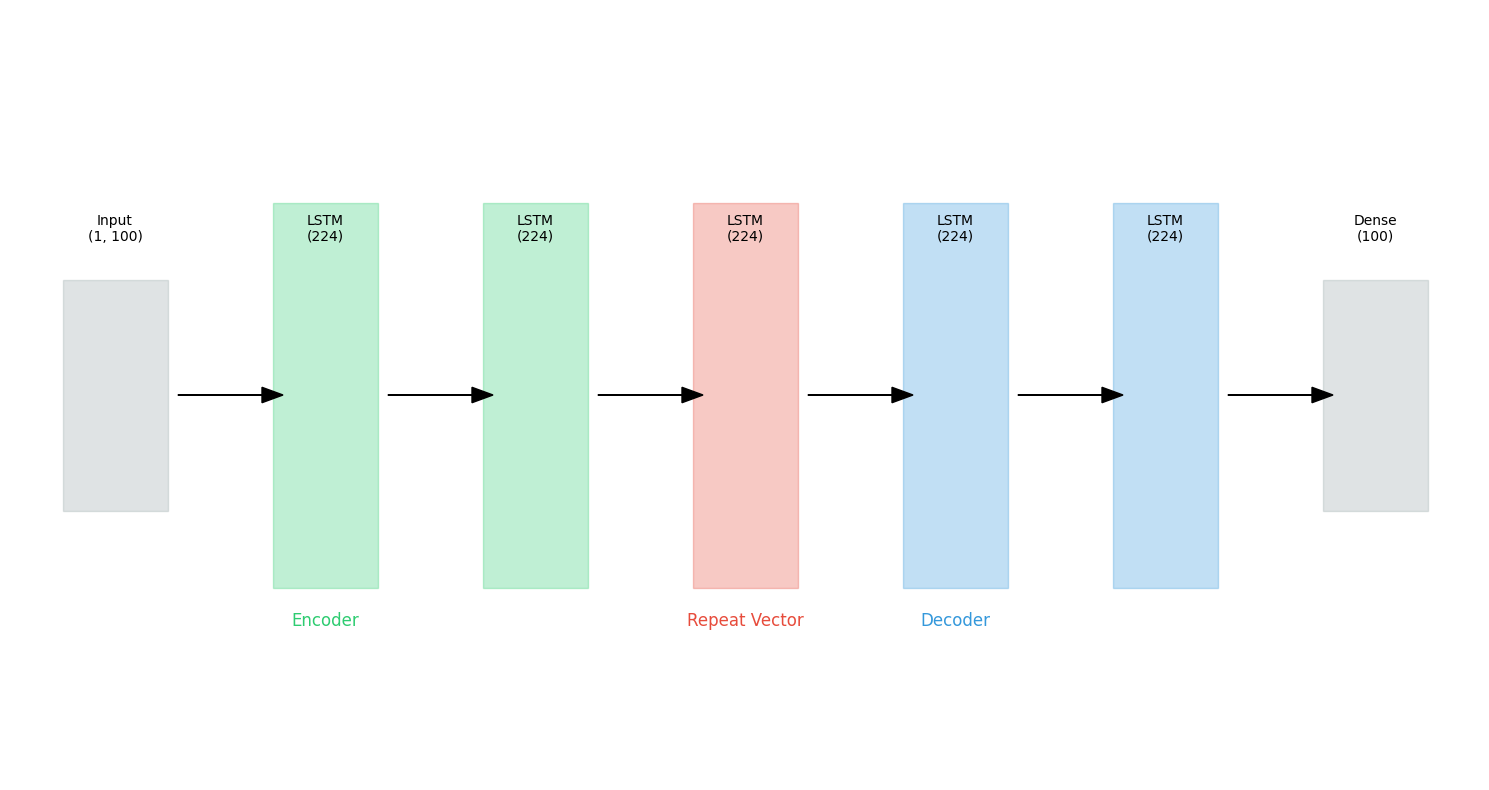

In [9]:
def draw_lstm_architecture():
    # Create figure and axis
    fig, ax = plt.subplots(figsize=(15, 8))
    
    # Define positions
    x_positions = [0, 2, 4, 6, 8, 10, 12]
    y_center = 5
    
    # Colors
    encoder_color = '#2ecc71'  # Green
    decoder_color = '#3498db'  # Blue
    bottleneck_color = '#e74c3c'  # Red
    io_color = '#95a5a6'  # Gray for input/output layers

    # Draw layers
    def draw_layer(x, text, color, is_io=False):
        if is_io:  # Changed is_input to is_io for both input and output
            width, height = 1, 3  # Smaller height for input/output
        else:
            width, height = 1, 5
        rect = plt.Rectangle((x - width/2, y_center - height/2), width, height,
                           facecolor=color, alpha=0.3, edgecolor=color)
        ax.add_patch(rect)
        plt.text(x, y_center + 2, text, ha='center', fontsize=10)
    
    # Input layer
    draw_layer(x_positions[0], f'Input\n(1, {normal_train_data_scaled_lstm.shape[2]})', io_color, is_io=True)
    
    # Encoder layers
    draw_layer(x_positions[1], 'LSTM\n(224)', encoder_color)
    draw_layer(x_positions[2], 'LSTM\n(224)', encoder_color)
    
    # Bottleneck layer
    draw_layer(x_positions[3], 'LSTM\n(224)', bottleneck_color)
    
    # Decoder layers
    draw_layer(x_positions[4], 'LSTM\n(224)', decoder_color)
    draw_layer(x_positions[5], 'LSTM\n(224)', decoder_color)
    
    # Output layer - now matches input layer style
    draw_layer(x_positions[6], f'Dense\n({normal_train_data_scaled_lstm.shape[2]})', io_color, is_io=True)
    
    # Add arrows
    for i in range(len(x_positions)-1):
        plt.arrow(x_positions[i] + 0.6, y_center, 
                 x_positions[i+1] - x_positions[i] - 1.2, 0,
                 head_width=0.2, head_length=0.2, fc='k', ec='k')
    
    # Customize plot
    #plt.title('LSTM Autoencoder Architecture', pad=20, fontsize=14)
    plt.text(x_positions[1], y_center - 3, 'Encoder', ha='center', fontsize=12, color=encoder_color)
    plt.text(x_positions[3], y_center - 3, 'Repeat Vector', ha='center', fontsize=12, color=bottleneck_color)
    plt.text(x_positions[4], y_center - 3, 'Decoder', ha='center', fontsize=12, color=decoder_color)
    
    # Set limits and remove axes
    plt.xlim(-1, 13)
    plt.ylim(0, 10)
    ax.axis('off')
    
    plt.tight_layout()
    plt.show()

# Call the function to create the visualization
draw_lstm_architecture()

In [13]:
# define early stopping to prevent overfit
early_stopping = keras.callbacks.EarlyStopping(monitor="val_loss",
                                               patience=10,
                                               mode="min",
                                               verbose=1,
                                               restore_best_weights=True)

In [14]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.00044)
model.compile(optimizer=optimizer, loss='mae')

In [15]:
# fit model
history = model.fit(
    normal_train_data_scaled_lstm, normal_train_data_scaled_lstm,
    epochs=200,
    batch_size=128,
    validation_split=0.3,
    callbacks=[early_stopping],
    shuffle=True,
    verbose=1)

Epoch 1/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.4660 - val_loss: 0.4507
Epoch 2/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.4552 - val_loss: 0.4195
Epoch 3/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.4189 - val_loss: 0.3989
Epoch 4/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.3927 - val_loss: 0.3876
Epoch 5/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.3943 - val_loss: 0.3807
Epoch 6/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.3801 - val_loss: 0.3704
Epoch 7/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.3790 - val_loss: 0.3671
Epoch 8/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.3738 - val_loss: 0.3560
Epoch 9/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.3529 - val_loss: 0.3479
Epoch 10/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.3496 - val_loss: 0.3461
Epoch 11/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.3487 - val_loss: 0.3435
Epoch 12/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step

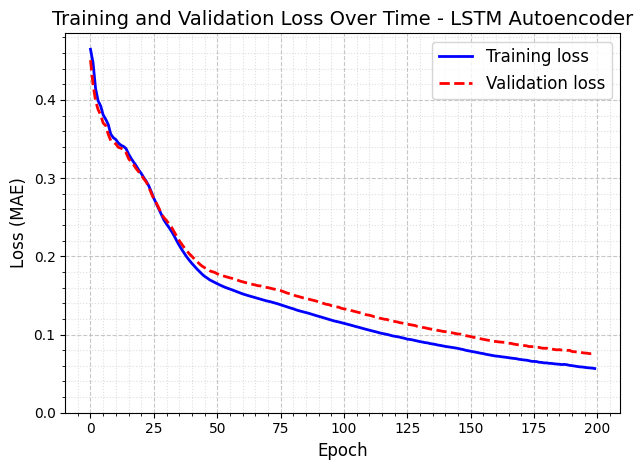

In [20]:
# Plot training and validation loss
plt.plot(history.history['loss'], 'b-', label='Training loss', linewidth=2)
plt.plot(history.history['val_loss'], 'r--', label='Validation loss', linewidth=2)

# Customize the plot
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss (MAE)', fontsize=12)
plt.title('Training and Validation Loss Over Time - LSTM Autoencoder', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)

# Add legend with larger font
plt.legend(fontsize=12)

# Adjust y-axis to start from 0
plt.ylim(bottom=0)

# Add minor grid lines for finer scale
plt.minorticks_on()
plt.grid(True, which='minor', linestyle=':', alpha=0.4)

# Make axis labels more readable
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Adjust layout to prevent label cutoff
plt.tight_layout()

plt.show()

In [14]:
from keras import ops
model.save('../../../models/lstm_autoencoder_best.keras')

In [9]:
load_model = tf.keras.models.load_model('../../../models/lstm_autoencoder_best.keras')

225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


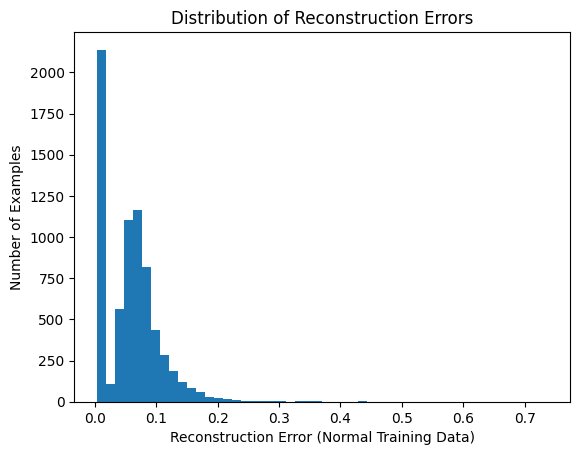

In [16]:
# Calculate reconstruction errors for test data
train_reconstructions_normal = load_model.predict(normal_train_data_scaled_lstm)
train_loss_normal = tf.keras.losses.mae(train_reconstructions_normal, normal_train_data_scaled_lstm)
# Flatten the loss array and convert to numpy for plotting
train_loss_normal_flat = train_loss_normal.numpy().flatten()

plt.hist(train_loss_normal_flat, bins=50)
plt.xlabel("Reconstruction Error (Normal Training Data)")
plt.ylabel("Number of Examples")
plt.title("Distribution of Reconstruction Errors")
plt.show()


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


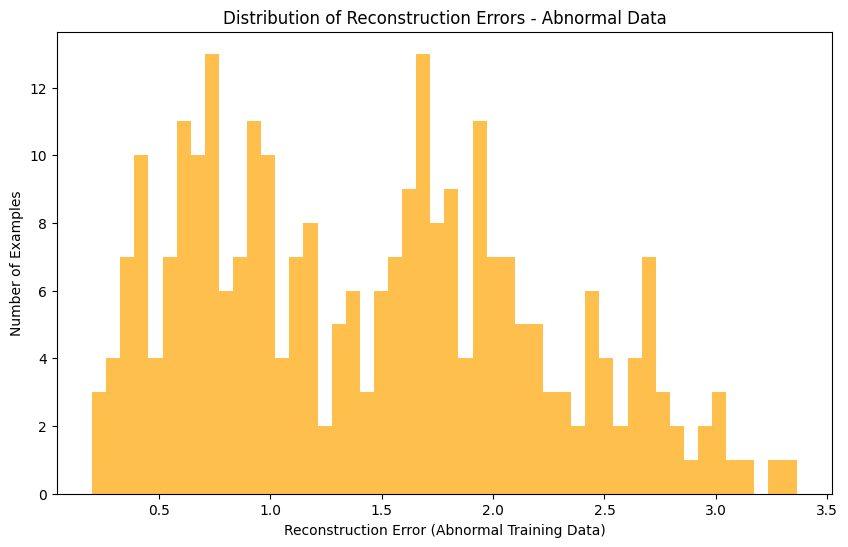


Minimum reconstruction error for abnormal data: 0.2007


In [17]:
# Calculate reconstruction errors for abnormal data
train_reconstructions_abnormal = load_model.predict(abnormal_train_data_scaled_lstm)
train_loss_abnormal = tf.keras.losses.mae(train_reconstructions_abnormal, abnormal_train_data_scaled_lstm)
# Flatten the loss array and convert to numpy for plotting
train_loss_abnormal_flat = train_loss_abnormal.numpy().flatten()

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(train_loss_abnormal_flat, bins=50, color='orange', alpha=0.7)
plt.xlabel("Reconstruction Error (Abnormal Training Data)")
plt.ylabel("Number of Examples")
plt.title("Distribution of Reconstruction Errors - Abnormal Data")
plt.show()

# Calculate and display minimum reconstruction error for abnormal data
min_error = np.min(train_loss_abnormal_flat)
print(f"\nMinimum reconstruction error for abnormal data: {min_error:.4f}")

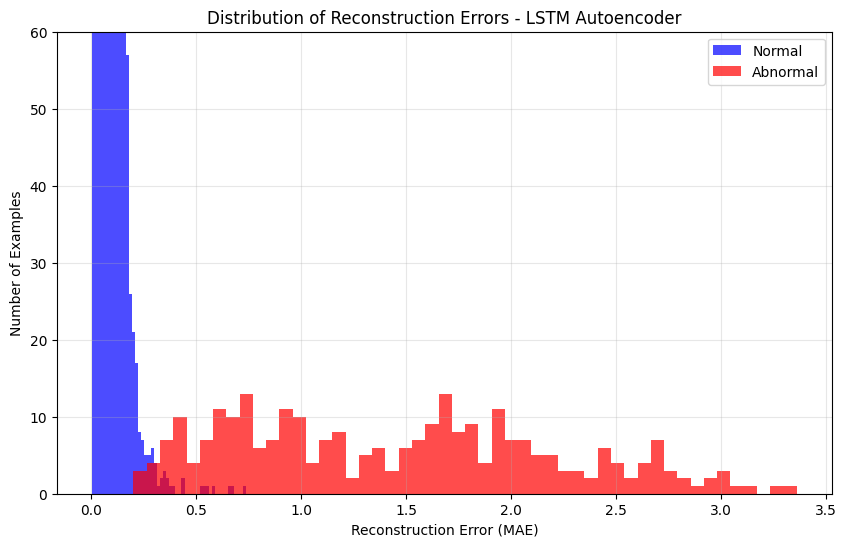

In [18]:
# Create combined histogram plot
plt.figure(figsize=(10, 6))
plt.hist(train_loss_normal_flat, bins=50, alpha=0.7, label='Normal', color='blue')
plt.hist(train_loss_abnormal_flat, bins=50, alpha=0.7, label='Abnormal', color='red')
plt.ylim(0, 60)
plt.xlabel('Reconstruction Error (MAE)')
plt.ylabel('Number of Examples')
plt.title('Distribution of Reconstruction Errors - LSTM Autoencoder')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [23]:
# Calculate thresholds
low_threshold = 0.197 # all anomalies are caught
high_threshold = np.percentile(train_loss_normal, 99.99)  # Loose threshold (99th percentile)
print("Low threshold: ", low_threshold)
print("High threshold: ", high_threshold)


Low threshold:  0.197
High threshold:  0.6914749


In [24]:
# Function to calculate precision, recall, and F1 score
def calculate_metrics(threshold, normal_losses, abnormal_losses):
    # Convert TensorFlow tensors to NumPy arrays
    normal_losses = normal_losses.numpy()
    abnormal_losses = abnormal_losses.numpy()
    
    predictions_normal = (normal_losses > threshold).astype(int)
    predictions_abnormal = (abnormal_losses > threshold).astype(int)
    
    tp = np.sum(predictions_abnormal == 1)
    fp = np.sum(predictions_normal == 1)
    fn = np.sum(predictions_abnormal == 0)
    
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    
    return precision, recall, f1

In [25]:
# Generate threshold values based on the range of reconstruction errors
min_loss = min(np.min(train_loss_normal_flat), np.min(train_loss_abnormal_flat))
max_loss = max(np.max(train_loss_normal_flat), np.max(train_loss_abnormal_flat))
thresholds = np.linspace(min_loss, max_loss, 100)

# Calculate metrics for each threshold
precisions = []
recalls = []
f1_scores = []

for threshold in thresholds:
    precision, recall, f1 = calculate_metrics(threshold, train_loss_normal, train_loss_abnormal)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

# Find the best F1 score and its threshold
best_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_idx]
best_f1 = f1_scores[best_idx]

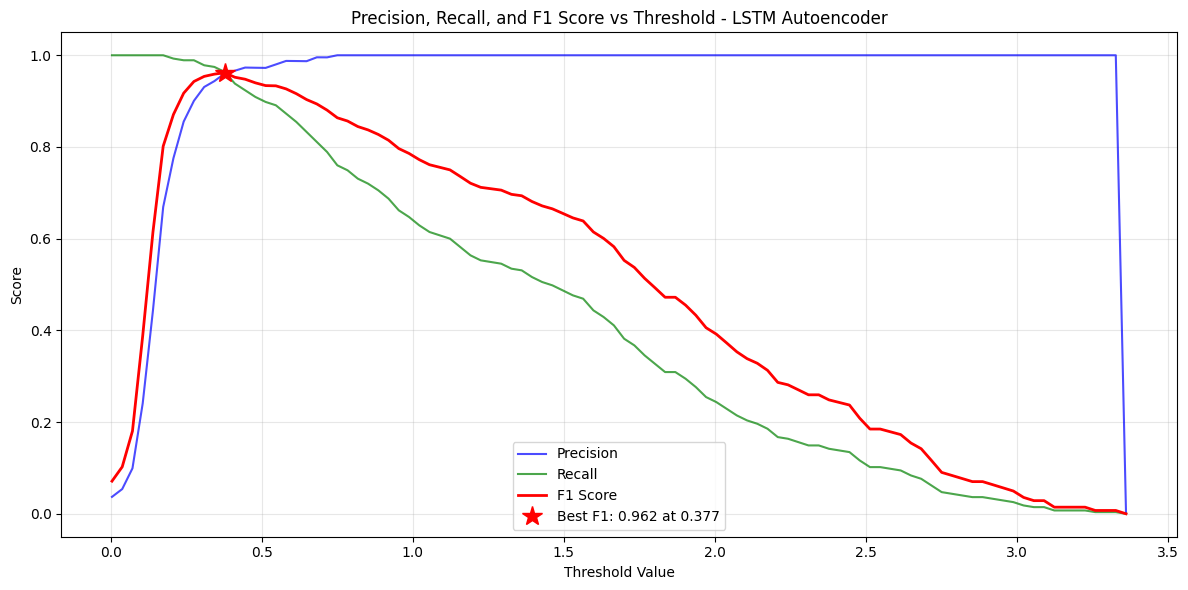


Optimal threshold (best F1 score): 0.3767
Best F1 score: 0.9619
Precision at best F1: 0.9601
Recall at best F1: 0.9636


In [26]:
# Plot metrics vs threshold
plt.figure(figsize=(12, 6))
plt.plot(thresholds, precisions, 'b-', label='Precision', alpha=0.7)
plt.plot(thresholds, recalls, 'g-', label='Recall', alpha=0.7)
plt.plot(thresholds, f1_scores, 'r-', label='F1 Score', linewidth=2)

# Mark the best F1 score
plt.plot(best_threshold, best_f1, 'r*', markersize=15, 
         label=f'Best F1: {best_f1:.3f} at {best_threshold:.3f}')

# Customize the plot
plt.xlabel('Threshold Value')
plt.ylabel('Score')
plt.title('Precision, Recall, and F1 Score vs Threshold - LSTM Autoencoder')
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

# Print the optimal threshold and metrics
print(f"\nOptimal threshold (best F1 score): {best_threshold:.4f}")
print(f"Best F1 score: {best_f1:.4f}")
print(f"Precision at best F1: {precisions[best_idx]:.4f}")
print(f"Recall at best F1: {recalls[best_idx]:.4f}")


In [27]:
import json
# Save threshold to a JSON file
threshold_data = {
    'low_threshold': float(low_threshold),  # Convert to native Python float
    'middle_threshold': float(best_threshold),  # Convert numpy.float32 to native Python float
    'high_threshold': float(high_threshold),  # Convert numpy.float32 to native Python float
}

# Save in the same directory as the model
with open('../../../models/lstm_thresholds.json', 'w') as f:
    json.dump(threshold_data, f)

In [28]:
# Verify the saved data
with open('../../../models/lstm_thresholds.json', 'r') as f:
    loaded_thresholds = json.load(f)
print("Saved thresholds:", loaded_thresholds)

Saved thresholds: {'low_threshold': 0.197, 'middle_threshold': 0.37674182653427124, 'high_threshold': 0.6914749145507812}
